# Interpretação de intervalos de confiança

In [148]:
import numpy as np
from scipy.stats import t
import pandas as pd
import matplotlib.pyplot as plt

In [206]:
populacao = np.random.rand(100000) * 100
#populacao = np.random.exponential(5, 100000)

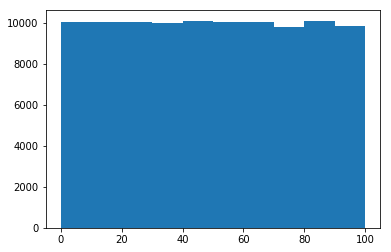

In [207]:
plt.hist(populacao)
plt.show()

In [208]:
pd.DataFrame(list(populacao)).describe()

,0
count,100000.000000
mean,49.877841
std,28.827148
min,0.002506
25%,24.973975
50%,49.807084
75%,74.817083
max,99.999619


In [209]:
media_populacao = populacao.mean()

In [218]:
n = 20
amostra = np.random.choice(populacao, n)

In [219]:
pd.DataFrame(amostra).describe()

,0
count,20.000000
mean,49.602287
std,25.190072
min,5.730764
25%,31.394813
50%,52.283398
75%,67.717257
max,95.801729


In [220]:
def IC(amostra, nivel_confianca = 0.95):
    
    '''Calcula o intervalo de confianca para a média populacional a partir de uma amostra'''
    
    alfa = 1 - nivel_confianca
    Xbarra = float(amostra.mean())
    s = float(amostra.std())
    n = len(amostra)
    
    glib = n - 1
    tc = -t.ppf(alfa/2, glib)
    
    e = tc * s / np.sqrt(n)
    intervalo = (Xbarra - e, Xbarra + e)
    
    return(intervalo)

In [221]:
IC(amostra)

(38.111483039997424, 61.09309155270374)

In [222]:
def IC_contem_media_populacional(populacao, intervalo):

    media_pop = populacao.mean()
    
    limite_inferior = intervalo[0]
    limite_superior = intervalo[1]
    
    return ((media_pop > limite_inferior) & (media_pop < limite_superior))

In [223]:
IC_contem_media_populacional(populacao, IC(amostra))

True

In [226]:
Numero_Simulacoes = 2000

k = 0
for simulacao in range(Numero_Simulacoes):
    
    amostra = np.random.choice(populacao, n)
    intervalo = IC(amostra)
    contem = IC_contem_media_populacional(populacao, intervalo)
    
    print(str(np.round(intervalo,2)) + " : " + str(contem))
    
    if(contem):
        k += 1



[ 41.97  68.28] : True
[ 30.37  58.71] : True
[ 26.84  52.2 ] : True
[ 40.96  70.83] : True
[ 41.11  67.67] : True
[ 27.63  53.  ] : True
[ 41.62  66.43] : True
[ 35.96  59.38] : True
[ 39.17  66.2 ] : True
[ 36.39  69.34] : True
[ 29.69  55.71] : True
[ 33.96  55.32] : True
[ 53.79  79.58] : False
[ 30.56  57.49] : True
[ 31.02  58.68] : True
[ 49.68  71.43] : True
[ 35.57  62.88] : True
[ 32.83  63.75] : True
[ 36.6   64.29] : True
[ 32.55  63.88] : True
[ 39.3   69.01] : True
[ 32.5   56.73] : True
[ 37.9  66.9] : True
[ 37.01  65.35] : True
[ 39.31  67.07] : True
[ 36.53  64.28] : True
[ 38.54  61.23] : True
[ 46.52  72.11] : True
[ 20.66  48.3 ] : False
[ 33.41  58.53] : True
[ 31.55  56.57] : True
[ 32.74  57.33] : True
[ 31.54  55.2 ] : True
[ 53.8   80.72] : False
[ 41.07  66.31] : True
[ 36.63  60.03] : True
[ 47.31  79.39] : True
[ 26.42  53.38] : True
[ 27.67  55.43] : True
[ 21.32  47.31] : False
[ 35.49  61.93] : True
[ 40.86  67.25] : True
[ 38.34  64.9 ] : True
[ 40.02  

[ 31.97  58.95] : True
[ 43.6   69.43] : True
[ 47.79  68.88] : True
[ 31.79  61.04] : True
[ 42.83  66.86] : True
[ 37.88  64.6 ] : True
[ 44.81  70.08] : True
[ 43.1   66.39] : True
[ 31.97  57.98] : True
[ 43.53  67.65] : True
[ 42.31  67.87] : True
[ 32.08  59.91] : True
[ 39.48  68.54] : True
[ 26.85  52.86] : True
[ 31.7   58.12] : True
[ 29.9   55.69] : True
[ 33.79  59.09] : True
[ 26.48  53.86] : True
[ 40.83  71.04] : True
[ 51.84  75.53] : False
[ 31.78  61.07] : True
[ 43.97  70.54] : True
[ 32.44  58.42] : True
[ 38.65  60.91] : True
[ 33.76  59.85] : True
[ 38.68  67.59] : True
[ 36.92  64.43] : True
[ 35.38  64.96] : True
[ 30.83  59.08] : True
[ 40.73  65.91] : True
[ 41.77  68.61] : True
[ 35.91  62.79] : True
[ 48.35  68.4 ] : True
[ 34.   61.9] : True
[ 23.15  49.44] : False
[ 20.97  47.7 ] : False
[ 34.12  61.87] : True
[ 34.33  57.95] : True
[ 41.23  64.37] : True
[ 41.42  69.47] : True
[ 34.11  60.37] : True
[ 43.    69.84] : True
[ 31.79  60.88] : True
[ 35.14  6

[ 42.98  67.06] : True
[ 33.93  61.43] : True
[ 43.55  65.79] : True
[ 44.26  70.15] : True
[ 24.82  49.25] : False
[ 36.52  60.89] : True
[ 44.53  65.58] : True
[ 30.02  53.08] : True
[ 36.08  63.35] : True
[ 31.77  53.28] : True
[ 39.54  68.19] : True
[ 52.63  77.54] : False
[ 29.57  52.73] : True
[ 36.16  66.1 ] : True
[ 30.76  58.43] : True
[ 31.88  62.14] : True
[ 34.61  62.56] : True
[ 36.8   63.39] : True
[ 42.27  70.39] : True
[ 41.33  65.4 ] : True
[ 40.71  67.61] : True
[ 37.36  59.25] : True
[ 45.76  66.31] : True
[ 39.14  68.27] : True
[ 34.04  60.7 ] : True
[ 42.3  66.9] : True
[ 37.85  66.83] : True
[ 38.11  67.59] : True
[ 33.66  65.94] : True
[ 41.22  71.74] : True
[ 38.55  65.73] : True
[ 39.95  64.67] : True
[ 32.94  60.85] : True
[ 24.75  54.81] : True
[ 37.11  62.49] : True
[ 38.31  68.4 ] : True
[ 45.14  66.33] : True
[ 44.41  72.66] : True
[ 34.34  59.71] : True
[ 32.48  62.15] : True
[ 43.25  70.35] : True
[ 41.7  67.5] : True
[ 40.52  67.28] : True
[ 26.65  51.4

[ 32.22  55.88] : True
[ 32.87  60.6 ] : True
[ 40.98  65.02] : True
[ 30.35  59.04] : True
[ 33.85  56.49] : True
[ 26.62  53.57] : True
[ 22.46  56.44] : True
[ 37.13  63.13] : True
[ 35.18  60.62] : True
[ 42.43  68.46] : True
[ 45.9   71.05] : True
[ 26.76  48.3 ] : False
[ 37.25  66.07] : True
[ 35.16  60.04] : True
[ 25.7   48.97] : False
[ 44.26  72.78] : True
[ 46.04  70.42] : True
[ 24.85  52.18] : True
[ 39.97  62.4 ] : True
[ 17.17  41.57] : False
[ 25.15  53.09] : True
[ 28.77  53.85] : True
[ 39.44  68.69] : True
[ 29.92  57.67] : True
[ 29.77  58.53] : True
[ 35.18  62.13] : True
[ 32.35  55.78] : True
[ 18.6   45.36] : False
[ 43.04  68.65] : True
[ 36.26  60.59] : True
[ 41.52  66.39] : True
[ 47.72  74.78] : True
[ 29.47  57.48] : True
[ 31.18  57.78] : True
[ 25.16  44.67] : False
[ 57.32  80.01] : False
[ 38.36  61.02] : True
[ 37.34  66.61] : True
[ 36.19  61.53] : True
[ 44.68  65.47] : True
[ 36.76  56.4 ] : True
[ 33.52  62.27] : True
[ 43.93  66.1 ] : True
[ 37.

[ 38.22  64.96] : True
[ 28.81  58.17] : True
[ 44.67  68.87] : True
[ 43.54  73.63] : True
[ 37.29  66.46] : True
[ 34.84  63.77] : True
[ 46.89  75.45] : True
[ 39.03  65.02] : True
[ 31.14  58.52] : True
[ 35.09  61.54] : True
[ 43.5   69.81] : True
[ 38.12  64.94] : True
[ 34.2   62.67] : True
[ 38.53  65.44] : True
[ 44.46  69.17] : True
[ 22.53  48.32] : False
[ 36.41  61.58] : True
[ 44.87  67.99] : True
[ 31.    61.13] : True
[ 38.92  69.34] : True
[ 47.09  71.37] : True
[ 37.96  65.65] : True
[ 39.02  64.98] : True
[ 37.94  65.99] : True
[ 32.99  63.98] : True
[ 34.81  62.07] : True
[ 29.47  52.06] : True
[ 32.87  58.31] : True
[ 37.95  62.55] : True
[ 21.63  43.42] : False
[ 27.44  58.2 ] : True
[ 40.69  64.13] : True
[ 31.5   61.23] : True
[ 29.85  53.58] : True
[ 43.36  71.16] : True
[ 30.62  57.76] : True
[ 30.75  57.54] : True
[ 36.8   61.41] : True
[ 39.79  62.97] : True
[ 23.54  43.99] : False
[ 36.12  63.18] : True
[ 35.6   65.49] : True
[ 38.29  66.38] : True
[ 18.74 

In [227]:
print("Fracao das amostras cujos ICs contém a média populacional real:")
print(str(100*float(k) / Numero_Simulacoes) + "%")

Fracao das amostras cujos ICs contém a média populacional real:
94.95%
